In [4]:
import torch
from torch import nn
import matplotlib.pyplot as plt


In [16]:
%matplotlib inline
%config InlineBackend.figure_format='retina'


In [5]:
torch.__version__

'2.0.1+cu117'

In [6]:
# create known parameters
weight = 0.7
bias = 0.3

#Create data

start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [8]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [14]:
def plot_predictions(x_train, y_train, x_test, y_test, predictions = None):

    """
    Plots training data, test data and compares predictions.
    """
    plt.figure(figsize=(6,4))

    plt.scatter(x_train, y_train, c = 'b' , s=4, label = 'Train data')
    plt.scatter(x_test, y_test, c = 'g', s=4, label='Testing data')

    if predictions is not None: 
        plt.scatter(x_test, predictions, c = 'r', s=4, label= 'Predictions')

    plt.legend(prop={'size': 14})   

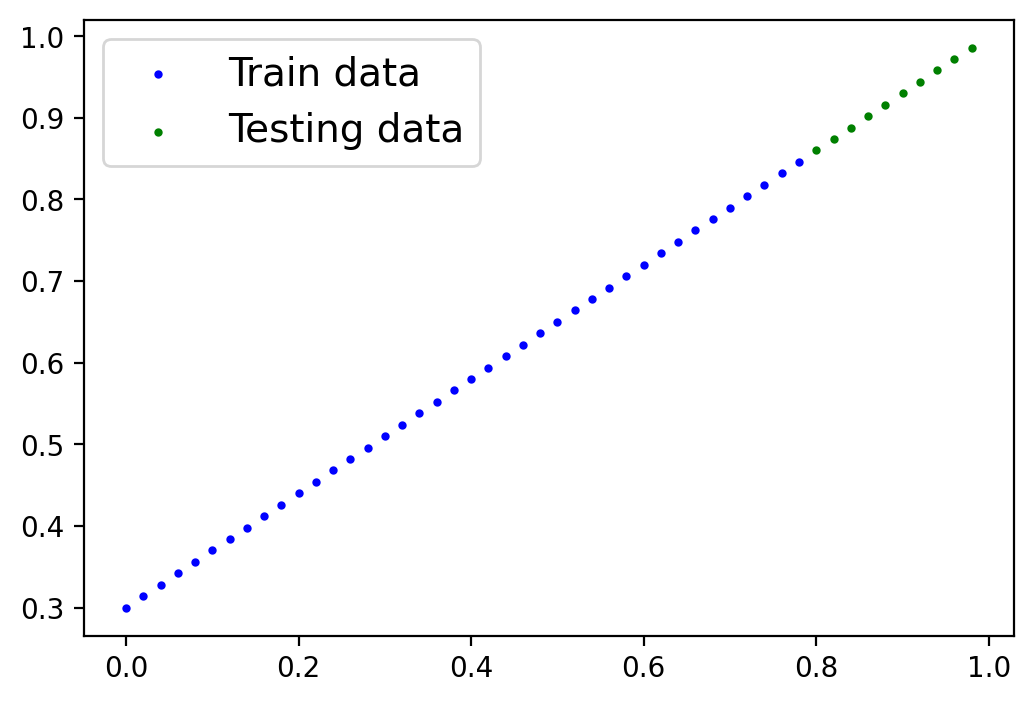

In [17]:
plot_predictions(X_train, y_train, X_test, y_test)

## 2. Build model

In [24]:
class LinearRegressionModel(nn.Module):

    def __init__(self):

        super().__init__()

        self.bias = nn.Parameter(torch.randn(1, dtype = torch.float), requires_grad=True)
        self.weights = nn.Parameter(torch.randn(1, dtype = torch.float), requires_grad=True)


    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias


In [25]:
torch.manual_seed(42)

model_0 = LinearRegressionModel()

list(model_0.parameters())



[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [26]:
model_0.state_dict()

OrderedDict([('bias', tensor([0.3367])), ('weights', tensor([0.1288]))])

In [27]:
with torch.inference_mode():
    y_preds = model_0(X_test)

In [28]:
# Check the predictions
print(f"Number of testing samples: {len(X_test)}") 
print(f"Number of predictions made: {len(y_preds)}")
print(f"Predicted values:\n{y_preds}")

Number of testing samples: 10
Number of predictions made: 10
Predicted values:
tensor([[0.4397],
        [0.4423],
        [0.4449],
        [0.4475],
        [0.4500],
        [0.4526],
        [0.4552],
        [0.4578],
        [0.4603],
        [0.4629]])


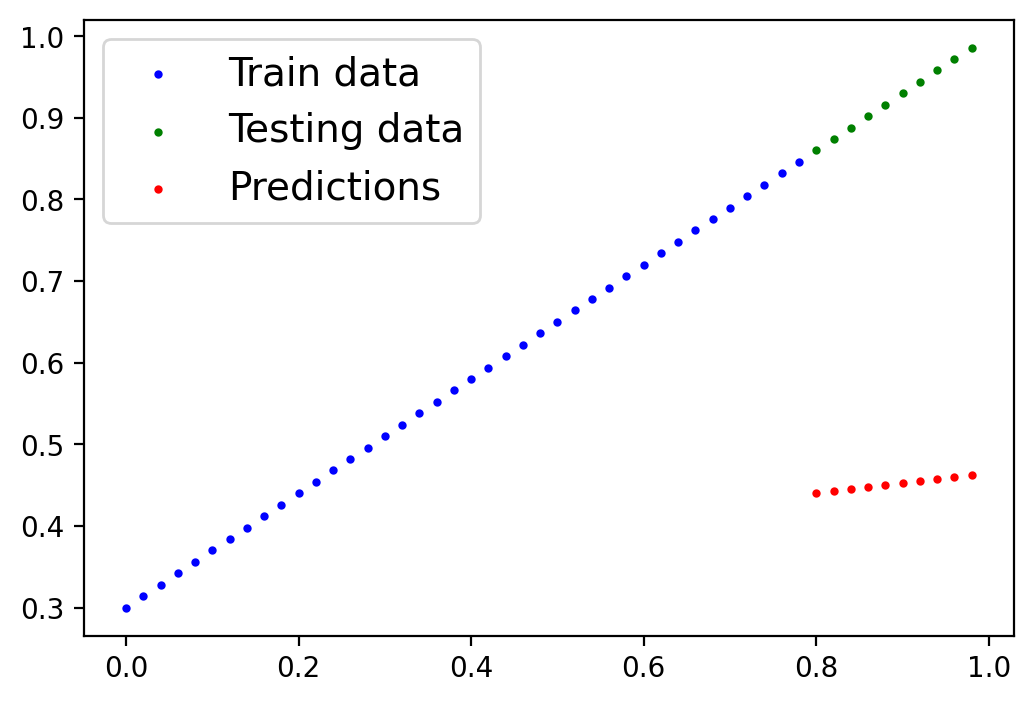

In [29]:
plot_predictions(X_train, y_train, X_test, y_test, predictions=y_preds)

In [30]:
y_test - y_preds

tensor([[0.4203],
        [0.4317],
        [0.4431],
        [0.4545],
        [0.4660],
        [0.4774],
        [0.4888],
        [0.5002],
        [0.5117],
        [0.5231]])

## 3. Train model

In [ ]:
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)